<a href="https://colab.research.google.com/github/IrsyadNurH/UTSPrakML/blob/main/1227050061_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [ ]:
# Mengimpor dataset
data = pd.read_csv('citrus.csv')  # Sesuaikan dengan lokasi file dataset

df = pd.DataFrame(data)

print(data.head())


     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9


In [ ]:
# Menyandikan label (name) menjadi angka: jeruk=0, anggur=1
df['label'] = df['name'].apply(lambda x: 0 if x == 'orange' else 1)

# Memisahkan fitur dan label
X = df.drop(['name', 'label'], axis=1)  # Mengambil fitur
y = df['label']  # Label

# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

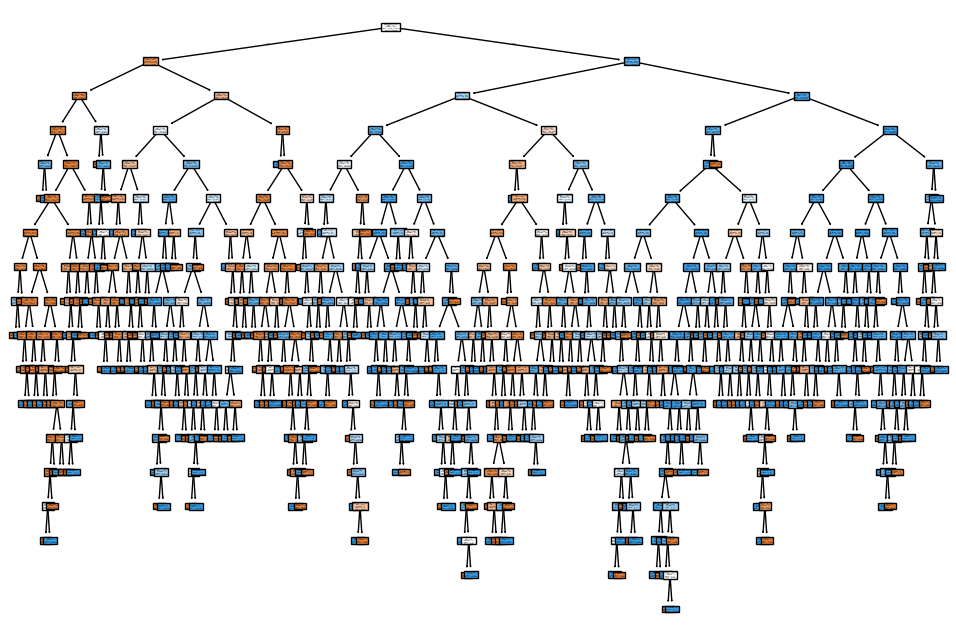

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['orange', 'grapefruit'])
plt.show()


In [ ]:
import joblib

# Menyimpan model
joblib.dump(model, 'decision_tree_model.pkl')



['decision_tree_model.pkl']

In [ ]:
import joblib

# Memuat model yang telah disimpan
model = joblib.load('decision_tree_model.pkl')


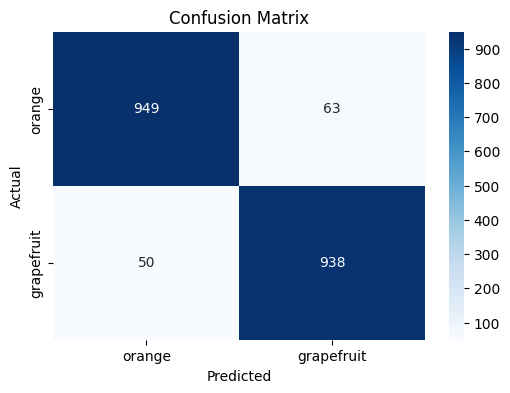

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['orange', 'grapefruit'], yticklabels=['orange', 'grapefruit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menghitung precision untuk kelas "orange" (label 0)
precision = precision_score(y_test, y_pred, pos_label=0)
print(f'Presisi untuk kelas "orange": {precision:.2f}')

# Menghitung recall untuk kelas "orange" (label 0)
recall = recall_score(y_test, y_pred, pos_label=0)
print(f'Recall untuk kelas "orange": {recall:.2f}')

# Menghitung F1-Score untuk kelas "orange" (label 0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print(f'F1-Score untuk kelas "orange": {f1:.2f}')

# Menampilkan laporan klasifikasi secara lengkap
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Akurasi: 94.35%
Presisi untuk kelas "orange": 0.95
Recall untuk kelas "orange": 0.94
F1-Score untuk kelas "orange": 0.94
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1012
           1       0.94      0.95      0.94       988

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Confusion Matrix:
[[949  63]
 [ 50 938]]
